Fetching data from google news API


In [1]:
from bs4 import BeautifulSoup
import requests
import csv

topic = input("Enter name : ")
url = f'https://news.google.com/search?q={topic}&hl=en-IN&gl=IN&ceid=IN%3Aen'
# url = 'https://news.google.com/home?hl=en-IN&gl=IN&ceid=IN:en'
page = requests.get(url)

soup = BeautifulSoup(page.text, 'html.parser')
articles = soup.find_all('a', class_='WwrzSb')
articles_list = []

for article in articles:
    link = 'https://news.google.com' + article['href'][1:]
    try:
        p1 = requests.get(link)
        if p1 is None:
            continue  # Skip this article if unable to retrieve the content

        if p1.status_code == 403:  # Access Denied
            continue

        if p1.status_code == 404:  # Not Found
            continue

        soup1 = BeautifulSoup(p1.text, 'html.parser')
        heading_tag = soup1.find('h1')

        if heading_tag:
            heading = heading_tag.get_text(strip=True)
            merged_text = '\n'.join([p.get_text(strip=True) for p in soup1.find_all('p')])
            articles_list.append((heading, merged_text))
    except requests.exceptions.ConnectionError as e:
        print(f"Connection error occurred: {e}")
        continue  # Continue to the next iteration if connection error occurs

# Save the scraped articles in a CSV file
file_name = f"{topic}_articles.csv"
with open(file_name, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Heading', 'Merged Text'])
    writer.writerows(articles_list)

print("Articles saved in:", file_name)


Enter name : Apple
Articles saved in: Apple_articles.csv


In [2]:
import pandas as pd
df= pd.read_csv(f'{topic}_articles.csv')
df

,Heading,Merged Text
0,Apple warns some Indian users their iPhone may...,Apple has sent a fresh round of threat notific...
1,Apple acknowledges widespread 'ghost touch' is...,The TOI Tech Desk is a dedicated team of journ...
2,Apple plans Mac line overhaul with AI-focused ...,Follow Us\nApple is nearing the production of ...
3,"Apple readies M4-powered Macs, expected to bri...",The TOI Tech Desk is a dedicated team of journ...
4,"Apple issues warning to users in India, 91 oth...",Apple has warned its users in India and 91 oth...
...,...,...
76,Apple 14-Inch M2 Pro MacBook Pro Is a Whopping...,Our expert deal-hunting staff showcases the be...
77,Apple iPad Pro 2024 Release Date: Latest News ...,"When Apple releases its next iPads, it will ma..."
78,Apple will relax repair policy to allow used g...,Here’s an early Earth Day victory for the plan...
79,Apple's AirPods Pro 2 Drop to $189 at Amazon W...,Our expert deal-hunting staff showcases the be...


Tokenization

In [4]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

df['tokens'] = df['Merged Text'].apply(tokenize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stop words

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]
df['tokens'] = df['tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def lower_case(tokens):
    return [token.lower() for token in tokens]
df['tokens'] = df['tokens'].apply(lower_case)
df

,Heading,Merged Text,tokens
0,Apple warns some Indian users their iPhone may...,Apple has sent a fresh round of threat notific...,"[apple, sent, fresh, round, threat, notificati..."
1,Apple acknowledges widespread 'ghost touch' is...,The TOI Tech Desk is a dedicated team of journ...,"[toi, tech, desk, dedicated, team, journalists..."
2,Apple plans Mac line overhaul with AI-focused ...,Follow Us\nApple is nearing the production of ...,"[follow, us, apple, nearing, production, m4, c..."
3,"Apple readies M4-powered Macs, expected to bri...",The TOI Tech Desk is a dedicated team of journ...,"[toi, tech, desk, dedicated, team, journalists..."
4,"Apple issues warning to users in India, 91 oth...",Apple has warned its users in India and 91 oth...,"[apple, warned, users, india, 91, countries, m..."
...,...,...,...
76,Apple 14-Inch M2 Pro MacBook Pro Is a Whopping...,Our expert deal-hunting staff showcases the be...,"[expert, deal-hunting, staff, showcases, best,..."
77,Apple iPad Pro 2024 Release Date: Latest News ...,"When Apple releases its next iPads, it will ma...","[apple, releases, next, ipads, ,, mark, end, l..."
78,Apple will relax repair policy to allow used g...,Here’s an early Earth Day victory for the plan...,"[’, early, earth, day, victory, planet, inhabi..."
79,Apple's AirPods Pro 2 Drop to $189 at Amazon W...,Our expert deal-hunting staff showcases the be...,"[expert, deal-hunting, staff, showcases, best,..."


In [7]:
def replace_apostrophes(tokens):
    appos = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "I would",
        "i'd've": "I would have",
        "i'll": "I will",
        "i'll've": "I will have",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it'd": "it had",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so is",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there had",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we had",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'alls": "you all's",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you had",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
    }
    reformed = [appos[word] if word in appos else word for word in tokens]
    return reformed
df['tokens'] = df['tokens'].apply(replace_apostrophes)
df

,Heading,Merged Text,tokens
0,Apple warns some Indian users their iPhone may...,Apple has sent a fresh round of threat notific...,"[apple, sent, fresh, round, threat, notificati..."
1,Apple acknowledges widespread 'ghost touch' is...,The TOI Tech Desk is a dedicated team of journ...,"[toi, tech, desk, dedicated, team, journalists..."
2,Apple plans Mac line overhaul with AI-focused ...,Follow Us\nApple is nearing the production of ...,"[follow, us, apple, nearing, production, m4, c..."
3,"Apple readies M4-powered Macs, expected to bri...",The TOI Tech Desk is a dedicated team of journ...,"[toi, tech, desk, dedicated, team, journalists..."
4,"Apple issues warning to users in India, 91 oth...",Apple has warned its users in India and 91 oth...,"[apple, warned, users, india, 91, countries, m..."
...,...,...,...
76,Apple 14-Inch M2 Pro MacBook Pro Is a Whopping...,Our expert deal-hunting staff showcases the be...,"[expert, deal-hunting, staff, showcases, best,..."
77,Apple iPad Pro 2024 Release Date: Latest News ...,"When Apple releases its next iPads, it will ma...","[apple, releases, next, ipads, ,, mark, end, l..."
78,Apple will relax repair policy to allow used g...,Here’s an early Earth Day victory for the plan...,"[’, early, earth, day, victory, planet, inhabi..."
79,Apple's AirPods Pro 2 Drop to $189 at Amazon W...,Our expert deal-hunting staff showcases the be...,"[expert, deal-hunting, staff, showcases, best,..."


In [8]:
def filter_alpha(tokens):
    return [word for word in tokens if word.isalpha()]

# Apply the function to the 'tokens' column
df['tokens'] = df['tokens'].apply(filter_alpha)
df

,Heading,Merged Text,tokens
0,Apple warns some Indian users their iPhone may...,Apple has sent a fresh round of threat notific...,"[apple, sent, fresh, round, threat, notificati..."
1,Apple acknowledges widespread 'ghost touch' is...,The TOI Tech Desk is a dedicated team of journ...,"[toi, tech, desk, dedicated, team, journalists..."
2,Apple plans Mac line overhaul with AI-focused ...,Follow Us\nApple is nearing the production of ...,"[follow, us, apple, nearing, production, compu..."
3,"Apple readies M4-powered Macs, expected to bri...",The TOI Tech Desk is a dedicated team of journ...,"[toi, tech, desk, dedicated, team, journalists..."
4,"Apple issues warning to users in India, 91 oth...",Apple has warned its users in India and 91 oth...,"[apple, warned, users, india, countries, may, ..."
...,...,...,...
76,Apple 14-Inch M2 Pro MacBook Pro Is a Whopping...,Our expert deal-hunting staff showcases the be...,"[expert, staff, showcases, best, price, drops,..."
77,Apple iPad Pro 2024 Release Date: Latest News ...,"When Apple releases its next iPads, it will ma...","[apple, releases, next, ipads, mark, end, long..."
78,Apple will relax repair policy to allow used g...,Here’s an early Earth Day victory for the plan...,"[early, earth, day, victory, planet, inhabit, ..."
79,Apple's AirPods Pro 2 Drop to $189 at Amazon W...,Our expert deal-hunting staff showcases the be...,"[expert, staff, showcases, best, price, drops,..."


Lemmatization

In [9]:
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
nltk.download('wordnet')

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply the function to the 'tokens' column
df['tokens'] = df['tokens'].apply(lemmatize_tokens)
df

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Heading,Merged Text,tokens
0,Apple warns some Indian users their iPhone may...,Apple has sent a fresh round of threat notific...,"[apple, sent, fresh, round, threat, notificati..."
1,Apple acknowledges widespread 'ghost touch' is...,The TOI Tech Desk is a dedicated team of journ...,"[toi, tech, desk, dedicated, team, journalist,..."
2,Apple plans Mac line overhaul with AI-focused ...,Follow Us\nApple is nearing the production of ...,"[follow, u, apple, nearing, production, comput..."
3,"Apple readies M4-powered Macs, expected to bri...",The TOI Tech Desk is a dedicated team of journ...,"[toi, tech, desk, dedicated, team, journalist,..."
4,"Apple issues warning to users in India, 91 oth...",Apple has warned its users in India and 91 oth...,"[apple, warned, user, india, country, may, vic..."
...,...,...,...
76,Apple 14-Inch M2 Pro MacBook Pro Is a Whopping...,Our expert deal-hunting staff showcases the be...,"[expert, staff, showcase, best, price, drop, d..."
77,Apple iPad Pro 2024 Release Date: Latest News ...,"When Apple releases its next iPads, it will ma...","[apple, release, next, ipads, mark, end, longe..."
78,Apple will relax repair policy to allow used g...,Here’s an early Earth Day victory for the plan...,"[early, earth, day, victory, planet, inhabit, ..."
79,Apple's AirPods Pro 2 Drop to $189 at Amazon W...,Our expert deal-hunting staff showcases the be...,"[expert, staff, showcase, best, price, drop, d..."


In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt') # Download 'punkt' if not already downloaded
nltk.download('stopwords')

def preprocessing(file_path):
    # Read CSV file
    df = pd.read_csv(file_path)

    # Function to remove null rows
    def remove_null_rows(df):
        return df.dropna().reset_index(drop=True)

    df = remove_null_rows(df)

    # Tokenization
    def tokenize_text(text):
        return word_tokenize(text)
    df['tokens'] = df['text'].apply(tokenize_text)

    def remove_stopwords(tokens):
        stop_words = set(stopwords.words('english'))
        return [word for word in tokens if word.lower() not in stop_words]
    df['tokens'] = df['tokens'].apply(remove_stopwords)

    # Convert tokens to lowercase
    def lower_case(tokens):
        return [token.lower() for token in tokens]
    df['tokens'] = df['tokens'].apply(lower_case)

    # Replace contractions and apostrophes
    def replace_apostrophes(tokens):
        appos = {
            # dictionary of contractions and their expansions
        }
        reformed = [appos[word] if word in appos else word for word in tokens]
        return reformed
    df['tokens'] = df['tokens'].apply(replace_apostrophes)

    # Filter out non-alphabetic tokens
    def filter_alpha(tokens):
        return [word for word in tokens if word.isalpha()]
    df['tokens'] = df['tokens'].apply(filter_alpha)

    # Lemmatization
    nltk.download('wordnet') # Download WordNet if not already downloaded
    lemmatizer = WordNetLemmatizer() # Initialize WordNet lemmatizer
    def lemmatize_tokens(tokens):
        return [lemmatizer.lemmatize(token) for token in tokens]
    df['tokens'] = df['tokens'].apply(lemmatize_tokens)

    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df = preprocessing('/content/train.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df['label'] = df['label'].map({0: 0, 1: 1, 2: 1, 3: 1})

In [14]:
! pip install tensorflow scikit-learn pandas numpy pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255316 sha256=da6378062103cd29fb09dd692744ca974ab58f8e4765fa5ce6a9795c58415e67
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import pickle5 as pickle

# Assuming 'preprocessed_df' is your preprocessed DataFrame containing the 'tokens' and 'label' columns
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'])

sequences = tokenizer.texts_to_sequences(df['tokens'])

# Pad sequences
maxlen = 100  # Define the maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=maxlen, truncating='post')

# Assuming 'preprocessed_df' is your preprocessed DataFrame containing the 'label' column
sentiment_labels = df['label'].values

# Now 'sentiment_labels' contains the sentiment labels from the 'label' column
from sklearn.model_selection import train_test_split

# Split padded_sequences and sentiment_labels into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, sentiment_labels, test_size=0.2)

# Now x_train, x_test contain the padded sequences, and y_train, y_test contain the sentiment labels


#Compilation of model: bidirectional LSTM model


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
1350/1350 [==============================] - 72s 46ms/step - loss: 0.1729 - accuracy: 0.9417 - val_loss: 0.1420 - val_accuracy: 0.9509
Epoch 2/100
1350/1350 [==============================] - 27s 20ms/step - loss: 0.1199 - accuracy: 0.9597 - val_loss: 0.1424 - val_accuracy: 0.9495
Epoch 3/100
1350/1350 [==============================] - 25s 19ms/step - loss: 0.0957 - accuracy: 0.9668 - val_loss: 0.1505 - val_accuracy: 0.9493
Epoch 4/100
750/750 [==============================] - 7s 8ms/step - loss: 0.1341 - accuracy: 0.9525
Test Loss: 0.13411585986614227
Test Accuracy: 0.9524999856948853


In [28]:
# Save the model
model.save("bidirectionallstm.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
df1 = pd.read_csv('/content/Apple_articles.csv')
df1

,Heading,Merged Text
0,Apple warns some Indian users their iPhone may...,Apple has sent a fresh round of threat notific...
1,Apple acknowledges widespread 'ghost touch' is...,The TOI Tech Desk is a dedicated team of journ...
2,Apple plans Mac line overhaul with AI-focused ...,Follow Us\nApple is nearing the production of ...
3,"Apple readies M4-powered Macs, expected to bri...",The TOI Tech Desk is a dedicated team of journ...
4,"Apple issues warning to users in India, 91 oth...",Apple has warned its users in India and 91 oth...
...,...,...
76,Apple 14-Inch M2 Pro MacBook Pro Is a Whopping...,Our expert deal-hunting staff showcases the be...
77,Apple iPad Pro 2024 Release Date: Latest News ...,"When Apple releases its next iPads, it will ma..."
78,Apple will relax repair policy to allow used g...,Here’s an early Earth Day victory for the plan...
79,Apple's AirPods Pro 2 Drop to $189 at Amazon W...,Our expert deal-hunting staff showcases the be...


Testing for apple_articles on Bi- LSTM

In [65]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved model
model = load_model('/content/bidirectionallstm.h5')

# Load the CSV file containing the input data
df = pd.read_csv('/content/Apple_articles.csv')

# Fill missing values with an empty string
df['Heading'] = df['Heading'].fillna('')

# Convert all values to strings
df['Heading'] = df['Heading'].astype(str)

# Preprocess the input data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Heading'])
x_test = tokenizer.texts_to_sequences(df['Heading'])
x_test = pad_sequences(x_test, maxlen=100)

# Use the model to predict on the input data
predictions = model.predict(x_test)

# If you have ground truth labels, evaluate the predictions
# Assuming 'y_test' contains your ground truth labels
# loss, accuracy = model.evaluate(x_test, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)


3/3 [==============================] - 3s 12ms/step


In [66]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved model
model = load_model('/content/bidirectionallstm.h5')

# Load the CSV file containing the input data
df = pd.read_csv('/content/Apple_articles.csv')

# Fill missing values with an empty string
df['Heading'] = df['Heading'].fillna('')

# Convert all values to strings
df['Heading'] = df['Heading'].astype(str)

# Preprocess the input data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Heading'])
x_test = tokenizer.texts_to_sequences(df['Heading'])
x_test = pad_sequences(x_test, maxlen=100)

# Use the model to predict on the input data
predictions = model.predict(x_test)

# Convert predictions to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32")

# Print the predicted classes
print("Predicted Classes:", predicted_classes)




3/3 [==============================] - 1s 11ms/step
Predicted Classes: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [71]:
import numpy as np

# Assuming you have the actual labels stored in 'actual_labels'
# Replace 'actual_labels' with the actual ground truth labels if available
actual_labels = df['Merged Text']  # Replace 'label_column_name' with the actual column name

# Convert the actual labels to binary format if needed
# Assuming 'actual_labels' contains string labels and you want to convert them to binary format
actual_labels_binary = np.where(actual_labels == 'negative', 0, 1)

# Calculate the accuracy based on the predicted classes and actual labels
accuracy = np.mean(predicted_classes.flatten() == actual_labels_binary)
print("Testing Accuracy:", accuracy)


Testing Accuracy: 0.9506172839506173


Extract instances classified as negative class

In [67]:
# Extract instances classified as negative class (class 0)
negative_class_indices = [i for i, c in enumerate(predicted_classes) if c == 0]
negative_class_data = df.iloc[negative_class_indices]

# Save the negative class instances to a CSV file
negative_class_data.to_csv('/content/negative_Apple_articles.csv', index=False)

# Print the negative class instances
print("Negative Class Instances:")
print(negative_class_data)

Negative Class Instances:
                                              Heading  \
38  AIMRA accuses Apple India of favouring large r...   
53  Apple Researchers Are Building AI Model Called...   
65  $14 billion and counting: Apple takes a signif...   
80  Apple to Allow Used Parts for Repairs, Startin...   

                                          Merged Text  
38  As the iPhone 15 series from Apple continues t...  
53  Photo Credit: Pexels/Mateusz Taciak\nThe LLM i...  
65  My Account\nFollow us on:\nPowered ByhBits - F...  
80  Apple todayannouncedthat customers and indepen...  


#single LSTM layer

Epoch 1/100
1350/1350 [==============================] - 32s 20ms/step - loss: 0.1754 - accuracy: 0.9407 - val_loss: 0.1404 - val_accuracy: 0.9520
Epoch 2/100
1350/1350 [==============================] - 12s 9ms/step - loss: 0.1221 - accuracy: 0.9585 - val_loss: 0.1394 - val_accuracy: 0.9518
Epoch 3/100
1350/1350 [==============================] - 11s 8ms/step - loss: 0.0993 - accuracy: 0.9641 - val_loss: 0.1623 - val_accuracy: 0.9497
Epoch 4/100
1350/1350 [==============================] - 11s 8ms/step - loss: 0.0790 - accuracy: 0.9702 - val_loss: 0.1635 - val_accuracy: 0.9483
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.1328 - accuracy: 0.9548
Test Loss (Simple Model): 0.13283579051494598
Test Accuracy (Simple Model): 0.9547916650772095


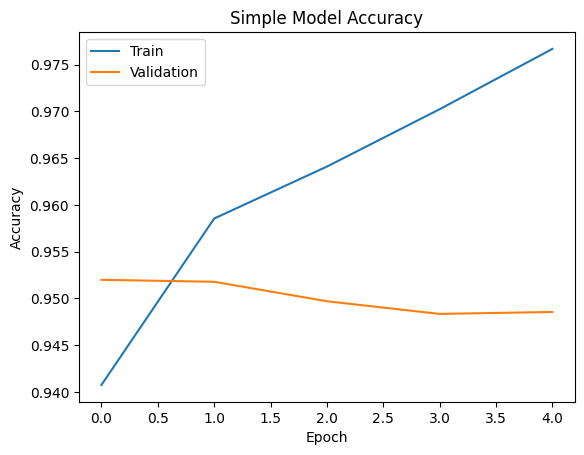

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Define the model
model_simple = Sequential()
model_simple.add(Embedding(input_dim=5000, output_dim=100, input_length=100))
model_simple.add(LSTM(units=64))
model_simple.add(Dense(units=64, activation='relu'))
model_simple.add(Dropout(0.5))
model_simple.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_simple = model_simple.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss_simple, accuracy_simple = model_simple.evaluate(x_test, y_test)
print("Test Loss (Simple Model):", loss_simple)
print("Test Accuracy (Simple Model):", accuracy_simple)

# Plot training and validation accuracy
plt.plot(history_simple.history['accuracy'])
plt.plot(history_simple.history['val_accuracy'])
plt.title('Simple Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [49]:
model.save("singlelstm.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing Apple_articles on single LSTM

In [62]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved model
model = load_model('/content/singlelstm.h5')

# Load the CSV file containing the input data
df = pd.read_csv('/content/Apple_articles.csv')

# Fill missing values with an empty string
df['Heading'] = df['Heading'].fillna('')

# Convert all values to strings
df['Heading'] = df['Heading'].astype(str)

# Preprocess the input data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Heading'])
x_test = tokenizer.texts_to_sequences(df['Heading'])
x_test = pad_sequences(x_test, maxlen=100)

# Load the ground truth labels if available
# Assuming 'y_test' contains your ground truth labels
# y_test = df['label_column_name']

# Use the model to predict on the input data
predictions = model.predict(x_test)

# Convert predictions to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32")

# Print the predicted classes
print("Predicted Classes:", predicted_classes)


3/3 [==============================] - 1s 12ms/step
Predicted Classes: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


Extract instances classified as negative class

In [63]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved model
model = load_model('/content/bidirectionallstm.h5')

# Load the CSV file containing the input data
df = pd.read_csv('/content/Apple_articles.csv')

# Fill missing values with an empty string
df['Heading'] = df['Heading'].fillna('')

# Convert all values to strings
df['Heading'] = df['Heading'].astype(str)

# Preprocess the input data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Heading'])
x_test = tokenizer.texts_to_sequences(df['Heading'])
x_test = pad_sequences(x_test, maxlen=100)

# Use the model to predict on the input data
predictions = model.predict(x_test)

# Convert predictions to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32")

# Extract instances classified as negative class (class 0)
negative_class_indices = [i for i, c in enumerate(predicted_classes) if c == 0]
negative_class_data = df.iloc[negative_class_indices]

# Save the negative class instances to a CSV file
negative_class_data.to_csv('/content/negative_class_data.csv', index=False)

# Print the negative class instances
print("Negative Class Instances:")
print(negative_class_data)


3/3 [==============================] - 1s 12ms/step
Negative Class Instances:
                                              Heading  \
38  AIMRA accuses Apple India of favouring large r...   
53  Apple Researchers Are Building AI Model Called...   
65  $14 billion and counting: Apple takes a signif...   
80  Apple to Allow Used Parts for Repairs, Startin...   

                                          Merged Text  
38  As the iPhone 15 series from Apple continues t...  
53  Photo Credit: Pexels/Mateusz Taciak\nThe LLM i...  
65  My Account\nFollow us on:\nPowered ByhBits - F...  
80  Apple todayannouncedthat customers and indepen...  


In [70]:
# Assuming you have the actual labels stored in 'actual_labels'
# Replace 'actual_labels' with the actual ground truth labels if available
actual_labels = df['Merged Text']  # Replace 'label_column_name' with the actual column name

# Convert the actual labels to binary format if needed
# Assuming 'actual_labels' contains string labels and you want to convert them to binary format
actual_labels_binary = np.where(actual_labels == 'negative', 0, 1)

# Evaluate the simple LSTM model
loss_simple, accuracy_simple = model_simple.evaluate(x_test, actual_labels_binary)
print("Simple LSTM Model - Test Loss:", loss_simple)
print("Simple LSTM Model - Test Accuracy:", accuracy_simple)

# Evaluate the bidirectional LSTM model
loss, accuracy = model.evaluate(x_test, actual_labels_binary)
print("Bidirectional LSTM Model - Test Loss:", loss)
print("Bidirectional LSTM Model - Test Accuracy:", accuracy)


3/3 [==============================] - 0s 10ms/step - loss: 0.4034 - accuracy: 0.8395
Simple LSTM Model - Test Loss: 0.4034012258052826
Simple LSTM Model - Test Accuracy: 0.8395061492919922
3/3 [==============================] - 0s 17ms/step - loss: 0.1926 - accuracy: 0.9506
Bidirectional LSTM Model - Test Loss: 0.1926085203886032
Bidirectional LSTM Model - Test Accuracy: 0.9506173133850098
